# __Chapter 8: Machine Learning with scikit-learn__
## scikit-learn library
- created in 2007 by Cournapeu but first real release was in 2010
- scientific python
    - generally defined as SciKits
# Machine Learning
<br/>
    - discipline dealing with study of methods for pattern recognition in datasets undergoing data analysis
    - deals with development of algorithms that 'learn' from data and make predictions
        - each methodology is based on building a specific model:
            - the choice of which method is to be applied is called a _learning problem_
            - the data subjected to a pattern in the learning phase can be arrays composed by a single value per element or mulivariate value. These values are often referred to as _features_ or _attributes_
# Supervised and Unsupervised Learning
## Supervised Learning <br/>
            - Methods in which the training set contains additional attributes that you want to predict (target variable). Thanks to these values, you can tell the model to provide similar results when you submit new values (_test set_)
            - _classification_ : the data in the training set belong to 2 or more classes or categories; then the labeled data allows the system to recognize the characteristics that distinguish each class. when you need new values the system will create according to its characteristics
            - _regression_ : when the value to be predicted is a continuous variable. The simplist case is when you want to find he line that describes the trend from a series of points represented in a scatterplot
## Unsupervised Learning <br/>
            - _clustering_: the goal is to discover groups of similar examples in the dataset
            - _dimensionality reduction_: reduction of high-dim dataset to one with only 2 or 3 dims, which helps with data viz and conveying more info in lower dims
    ### Training Set and Testing Set <br/>
        - training set refers to data being learning from
        - testing set refers to data is what we test our data on
        
## Supervised Learning with scikit-learn
- we will see:
    - classification, using (easy) Iris dataset
        - KNN classifier
        - support vector machines (SVC)
    - Regression, using the Diabetes dataset
        - Linear regression
        - support Vector Machines (SVR) <br/>
        <br/>
- Supervised learning consists of learning possible patterns between 2 or more features reading values from a training set; filled with targets or labels. Each model from scikit-learn is referred to as supervised estimators using fit(x,y). x are observed features, while y indicates the target. Once the estimator has carried out the training it will be able to predict the value for any new observation x __not__ labeled. This operation will make it through the predict(x) function

## Iris Flower Dataset
- usually used as a good example for _classification_ problems

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
iris.data #need to call attribute data on iris variable

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [2]:
iris.target #what item belongs to what flower

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

iris = datasets.load_iris()
x = iris.data[:,0] #x-axis - sepal length
y = iris.data[:,1] #y-axis - sepal width
species = iris.target

x_min , x_max = x.min() - .5, x.max() +.5  #idk why we add anything but okay then....
y_min, y_max = y.min() - .5, y.max() + .5

# scatterplot time!!

plt.figure()
plt.title('Iris Dataset - Classification By Sepal Sizes')
plt.scatter(x,y, c= species)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())
#show() not needed in jupyter

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

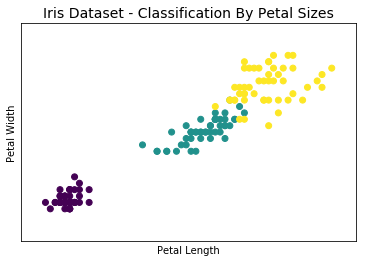

In [5]:
iris = datasets.load_iris()
x = iris.data[:,2] #x-axis - sepal length
y = iris.data[:,3] #y-axis - sepal width
species = iris.target

x_min , x_max = x.min() - .5, x.max() +.5  #idk why we add anything but okay then....
y_min, y_max = y.min() - .5, y.max() + .5

# scatterplot time!!

plt.figure()
plt.title('Iris Dataset - Classification By Petal Sizes',size=14)
plt.scatter(x,y, c= species)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())

# PCA Decomposition
- ___Principal Component Analysis (PCA)___: allows the reduction of dimensions of a system keeping all the info for the characterization of the various points, which the new dimensions are called _principal components_. 
    - dimension reduction taken care of by fit_transform( ) function, import from sklearn, use PCA( ) and define the new number of dimensions (principal components) from n_components option

[]

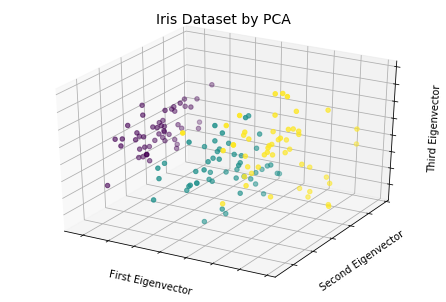

In [6]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D #in addition you can use mpl_toolkits.mplot3d

iris = datasets.load_iris()
species = iris.target
x_reduced = PCA(n_components = 3).fit_transform(iris.data)

#Scatter
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Iris Dataset by PCA', size =14)
ax.scatter(x_reduced[:,0],x_reduced[:,1],x_reduced[:,2],c=species)
ax.set_xlabel('First Eigenvector')
ax.set_ylabel('Second Eigenvector')
ax.set_zlabel('Third Eigenvector')
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())

# K-Nearest Neighbors Classifier
- given a new measurement of an iris flower, the task of the classifier is to figure out which flower species the measurement belongs to, simplest is _nearest neighbor_, which searches within training set for observation that most closely matches new sample
- __NOTE: if you have only 1 dataset be sure not to use for both training and testing (as it is kinda redundant)__
    - so before proceeding we need to split the iris data in 2 parts, 1 for testing and 1 for training
        - best practice is to have a random even mix of both (mix then divide)
            - in our case we will have 140 observations to train then 10 to test

In [7]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(0)
iris = datasets.load_iris()
x = iris.data
y = iris.target
i = np.random.permutation(len(iris.data))
x_train = x[i[:-10]]
y_train = y[i[:-10]]
x_test = x[i[-10:]]
y_test = y[i[-10:]]
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
knn.predict(x_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [9]:
y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

(1.5, 4.900000000000003)

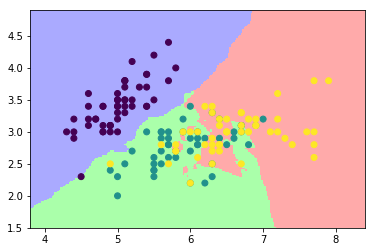

In [10]:
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()
x = iris.data[:,:2]       #X-axis: sepal length-width
y = iris.target           #species

x_min, x_max = x[:,0].min() -.5,x[:,0].max() +.5
y_min, y_max = x[:,1].min() -.5,x[:,1].max() +.5

#MESH
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
knn = KNeighborsClassifier()
knn.fit(x,y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()]) # np.ravel: Return a contiguous flattened array
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

#Plot the training points
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

(-0.4, 2.980000000000003)

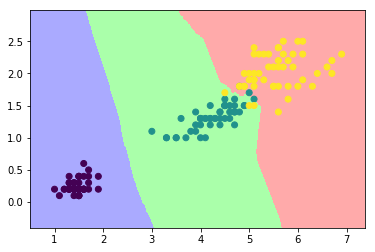

In [11]:
iris = datasets.load_iris()
x = iris.data[:,2:4]       #X-axis: sepal length-width
y = iris.target           #species

x_min, x_max = x[:,0].min() -.5,x[:,0].max() +.5
y_min, y_max = x[:,1].min() -.5,x[:,1].max() +.5

#MESH
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
knn = KNeighborsClassifier()
knn.fit(x,y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()]) #np.c_ :Translates slice objects to concatenation along the second axis
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

#Plot the training points
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

# Diabetes Dataset
- used first on 2004 (Annals of Statistics, by Eiron, Hastie, Johnson, and Tibshirani)
- data set contains 442 patients along with 10 columns of physiological data (age,sex, BMI,blood pressure, S1-S6(blood serum))

In [12]:
diabetes = datasets.load_diabetes()
diabetes.data[0] #first ten values of first patient

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

These values are a result of a processing, each of the 10 values was mean centered and subsequently scaled by the std dev times the number of samples:
<br><br>
$\sigma = \sqrt{\frac{\sum (x_i - \bar{x} )^2}{N}}$ (population) <br>
 $S = \sqrt{\frac{\sum (x_i - \bar{x} )^2}{N-1}}$ (sample) <br>
 $S = \sqrt{\frac{\sum x^2 - \frac{\sum(x^2)}{N}}{N-1}}$ (computational formula) <br>
 $\sigma^2 = \frac{\sum (x_i - \bar{x} )^2}{N}$ (population variance) <br>
 $S^2 = \frac{\sum (x_i - \bar{x})^2}{N-1}$ (sample variance)<br>
 <br><br>
 Some statisticians use the empirical rule to define outliers. For example, a few statisticians define
an outlier as a score in the set that falls outside of ±3 standard deviations of the mean. However,
caution is still urged before deciding to eliminate even these scores from an analysis because
although they may be improbable, they still occur.

In [13]:
#try wit age measurements, you will get something close to 1
np.sum(diabetes.data[:,0]**2)

1.0000000000000746

In [14]:
#even though these values are normalized and therefore difficult to read they continue to express the 10 traits
#indicators of the progress of disease are obtainable by means of the target attribute
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## Linear Regression: The Least Square Regression
- linear regression is a procedure that uses data contained in the training set to build a linear model
    -simplest is based on the equation of a rect with 2 parameters
- $y=a*x +c$ :
    - $x$: training set
    - $b$: slope
    - $c$: is the intercept of the rect represented by the model
- to use the predictive model you must import linear_model and then use the manufacturer LinearRegression() constructor to create the predictive model

In [15]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()
diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20] #train set of 442 - last 20
y_train = diabetes.target[:-20]
x_test = diabetes.data[-20:] #test set of last 20
y_test = diabetes.target[-20:]

#now apply the training set thru the use of the fit() funct.
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# once the model us trained you can get the 10 b coeff. calc for each physiological value using coef_ attribute
linreg.coef_

array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
       -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
        7.43519617e+02,  7.60951722e+01])

In [17]:
#if you apply the test set to the linreg prediction you will get a series of targets 
#to be compared with the values actually observed
linreg.predict(x_test)

array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

In [18]:
y_test #close!

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

a good indicator of what prediction should be perfect is the variance. the closer $\sigma^2 = 1$ the more perfectthe prediction

In [19]:
linreg.score(x_test, y_test)

0.5850753022690574

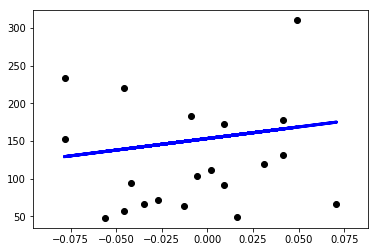

In [20]:
#taking account a single physiological factor (age in this case)
diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20] #train set of 442 - last 20
y_train = diabetes.target[:-20]
x_test = diabetes.data[-20:] #test set of last 20
y_test = diabetes.target[-20:]

x0_test = x_test[:,0]
x0_train = x_train[:,0]
x0_test = x0_test[:,np.newaxis] 
x0_train = x0_train[:,np.newaxis]
linreg = linear_model.LinearRegression()
linreg.fit(x0_train, y_train)
y = linreg.predict(x0_test)
plt.scatter(x0_test, y_test, color='k')
plt.plot(x0_test,y,color='b',linewidth=3)

↑  shows the blue line representing a linear correlation between ages of patients and disease progression.
<br><br>
Using __newaxis__ is used to increase the dimension of the existing array by one more dimension, when used once. Thus,a 1D array will become 2D array, and so on an so forth.

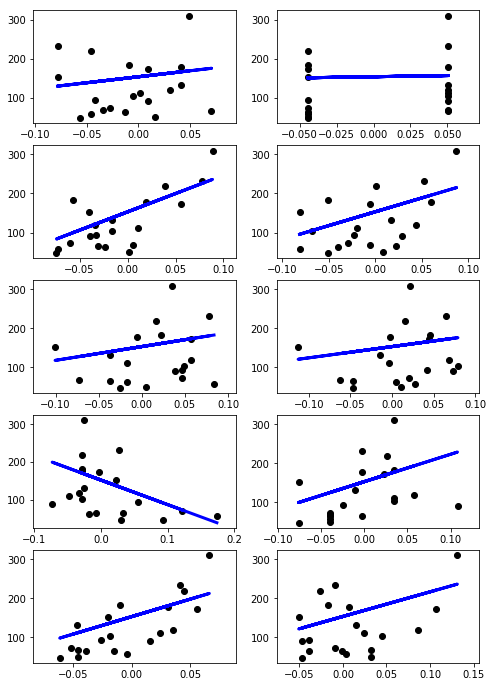

In [21]:
diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20] #train set of 442 - last 20
y_train = diabetes.target[:-20]
x_test = diabetes.data[-20:] #test set of last 20
y_test = diabetes.target[-20:]
plt.figure(figsize=(8,12))
for f in range(0,10): #need this to loop through each feature (10 models)
    xi_test = x_test[:,f] #f is each col or feature
    xi_train = x_train[:,f] #loop through all rows
    xi_test = xi_test[:,np.newaxis] #build a new dimension to hold next datum
    xi_train = xi_train[:,np.newaxis] #with train data too
    linreg.fit(xi_train,y_train) #now we fit (model)
    y = linreg.predict(xi_test) #use prediction
    plt.subplot(5,2,f+1) #5 by 2 graphs, f+1 to iterate next one
    plt.scatter(xi_test,y_test,color='k') 
    plt.plot(xi_test,y,color='b',linewidth=3)

## Support Vector Machines (SVMs)
-  __Support Vector Machines__ are a number of machine learning techniques that were first developed by AT&T labs by Vapnik in the early 90s. 

- the basis of this class of procedures are called _Support Vector_, which is a generalization of a previous algo called Generalized Portrait developed in Russia by Vapnik as well (1963)

    - simply put, they are binary or discriminating models working on 2 classes of differentiation, main task is to disciminate between the 2 classes.
    - during the learning phase the classifier project the obs on a multi-dim spaced called _decisional space_ and build a separation surface called the _decision boundary_ which divides the space into 2 areas of belonging.
    - simplest is the linear case but can be many shapes
    - SVC and SVR (classification and regression)

## Support Vector Classification (SVC)

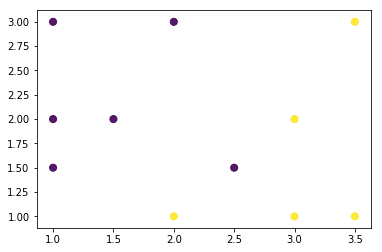

In [22]:
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)

Now that we've made the training set, you can apply SVC algo to create a line (decision boundary) in order to divide the decision area into 2 parts and this line will be placed as to maximize its distance of closest observations contained in the training set. First we define the model with SVC() constructor defining kernal as linear(class of set as an argument). Once trained, you can plot decision boundary wit dicision_function(). Then scatter blah blah

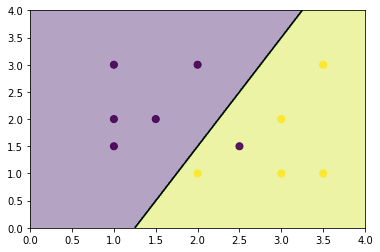

In [23]:
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='linear').fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z >0, alpha=0.4)
plt.contour(X,Y,Z,colors=['k'],linestyles=['-'],levels=[0])
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)

In [24]:
#distance tells relation to one of either class
#predict() will return the number of the corresponding class of belonging (0 for class in purple, 1 in yellow)
svc.predict([[1.5,2.5]])

array([0])

In [25]:
svc.predict([[2.5,1]])

array([1])

related concept : _Regularization_ → is set by parameter C: a small value of C means margin is calc using many or all of the obs around the line of separation(greater regularization), while a large value of C means that the margin is calculated on the observations near to the line of separation (lower regularization). C defaults to 1, can also highlight points with support_vectors array

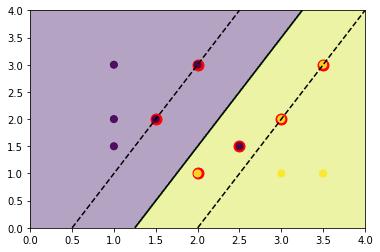

In [26]:
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='linear').fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z >0, alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'],linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='r')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)

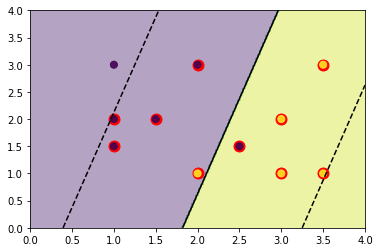

In [27]:
#these points are represented by rimmed circles in scatterplot
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='linear',C=0.1).fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z >0, alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'],linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='r')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)

## Nonlinear SVC
- can establish curves 2D or 3D based on the same principles of maximizing the distances btween the points closest to the surface
- can defined polynomial curves

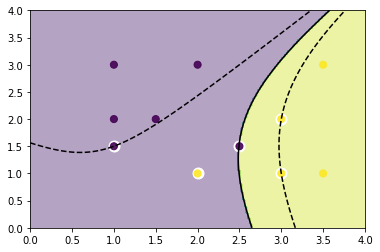

In [28]:
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='poly',C=0.1,degree=4).fit(x,y) #not 3 as stated in the book for his example
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z >0, alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'],linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='w')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)

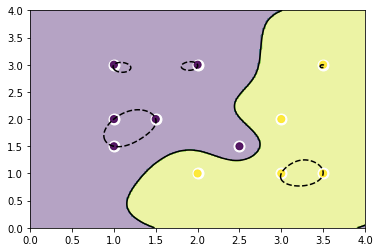

In [29]:
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='rbf',C=1,gamma=3).fit(x,y) 
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z >0, alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'],linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='w')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)

## Plotting Different SVM Classifiers Using the Iris Dataset
- decision boundaries intersect each other subdividing the decision area (2D) or decision volume (3D)
- linear models have linear decision boundaries (intersecting hyperplanes), while kernels with nonlinear att. like polynomial or Gaussian RBF decision boundaries are nonlinear

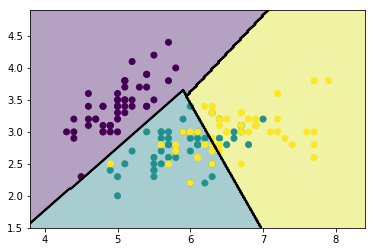

In [30]:
from sklearn import svm, datasets

iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
h = 0.05
svc = svm.SVC(kernel='linear',C=1.0).fit(x,y)
x_min,x_max = x[:,0].min()-0.5, x[:,0].max()+0.5
y_min,y_max = x[:,1].min() -0.5, x[:,1].max()+0.5

h = .02
X,Y = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z,alpha=0.4)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)

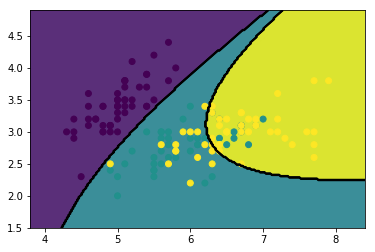

In [31]:
x = iris.data[:,:2]
y = iris.target
h=0.05
svc = svm.SVC(kernel='poly',C=1.0,degree=3).fit(x,y)
x_min, x_max = x[:,0].min()-0.5,x[:,0].max()+0.5
y_min, y_max = x[:,1].min()-0.5,x[:,1].max()+0.5

h=0.02
X,Y = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h)) #smart way to define the grid, I see
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z,alpha=0.9)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)

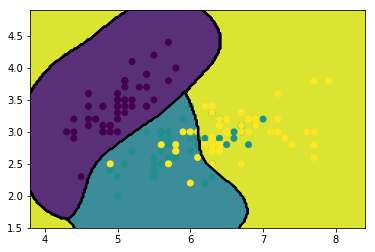

In [32]:
x = iris.data[:,:2]
y = iris.target
h=0.05
svc = svm.SVC(kernel='rbf',C=1.0,gamma=3).fit(x,y)
x_min, x_max = x[:,0].min()-0.5,x[:,0].max()+0.5
y_min, y_max = x[:,1].min()-0.5,x[:,1].max()+0.5

h=0.02
X,Y = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h)) #smart way to define the grid, I see
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z,alpha=0.9)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)

## Support Vector Regression (SVR)
 - _Support Vector Regression_ which not depend on the complete training set, but uses only a subset of elements, i.e. those closest to the decisional boundary. 
 - in a similar way te model provided by SVR also depends only on the subset of the training set
 - SVC and SVR are very similar, the only aspect to consider is the test set of data must be sorted in ascending order

In [33]:
diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]
x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]

x0_test = x_test[:,2]
x0_train = x_train[:,2]
x0_test = x0_test[:,np.newaxis]
x0_train = x0_train[:,np.newaxis]

x0_test.sort(axis=0)
x0_test = x0_test*100
x0_train = x0_train*100


In [34]:
svr = svm.SVR(kernel='linear',C=1.000) #maybe 1000 is a bit heavy for my CPU
svr2 = svm.SVR(kernel='poly',C=1.000,degree=2)
svr3 = svm.SVR(kernel='poly',C=1.000,degree=3)

In [35]:
svr.fit(x0_train,y_train)
svr2.fit(x0_train,y_train)
svr3.fit(x0_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
y = svr.predict(x0_test)
y2 = svr2.predict(x0_test)
y3 = svr3.predict(x0_test)

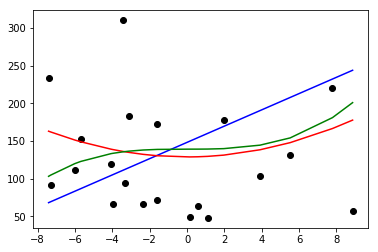

In [37]:
plt.scatter(x0_test,y_test,color='k')
plt.plot(x0_test,y,color='b')
plt.plot(x0_test,y2,color='r')
plt.plot(x0_test,y3,color='g')